
# Predicting Car Accident Severity using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting Car Accident Severity.

## 1. Problem  Definition


> In this project, we will try to predict car accident Severity 

## 2. Data 

The Oraginal Data Came from 
> https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv


## 3. Featrue

** Create Data Dictionary **
1. LOCATION : Description of the general location of the collision

2. SEVERITYCODE : A code that corresponds to the severity of the collision:
                 * 3 — fatality
                 * 2b —serious injury
                 * 2 — injury
                 * 1 — prop damage
                 * 0 — unknown   
3. SEVERITYDESC : A detailed description of the severity of the collision

4. COLLISIONTYPE : Collision type 

5. PERSONCOUNT : The total number of people involved in thecollision

6. PEDCOUNT : The number of pedestrians involved in the collision. This is entered by the state.

7. PEDCYLCOUNT : The number of bicycles involved in the collision. This is entered by the state.

8. VEHCOUNT : The number of vehicles involved in the collision. This is entered by the state.

9. INJURIES : The number of total injuries in the collision. This is entered by the state.

10. SERIOUSINJURIES : The number of serious injuries in the collision. This is entered by the state.

12. FATALITIES : The number of fatalities in the collision. This is entered by the state.

13. INCDATE : The date of the incident.

14. INCDTTM : The date and time of the incident.

15. JUNCTIONTYPE : Category of junction at which collision took place

16. SDOT_COLCODE : A code given to the collision by SDOT.

17. SDOT_COLDESC : A description of the collision corresponding to the collision code.

18. INATTENTIONIND : Whether or not collision was due to inattention. (Y/N)

19. UNDERINFL : Whether or not a driver involved was under the influence of drugs or alcohol.

20. WEATHER : A description of the weather conditions during the time of the collision.

21. ROADCOND : The condition of the road during the collision.

22. LIGHTCOND : The light conditions during the collision.

23. PEDROWNOTGRNT : Whether or not the pedestrian right of way was not granted. (Y/N)

24. SDOTCOLNUM : A number given to the collision by SDOT.

25. SPEEDING : Whether or not speeding was a factor in the collision. (Y/N)

26. ST_COLCODE : A code provided by the state that describes the collision.

27. ST_COLDESC : A description that corresponds to the state’s coding designation.

28. SEGLANEKEY : A key for the lane segment in which the collision occurred.

29. CROSSWALKKEY : A key for the crosswalk at which the collision occurred.

30. HITPARKEDCAR : Whether or not the collision involved hitting a parked car. (Y/N)

# Import all tools we need 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

#import model from Sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Import model evaluator 

from sklearn.model_selection import train_test_split

### Load Data 

In [2]:
df = pd.read_csv('Data-Collisions.csv')
df.head(10)

C:\Users\Mohamed Basher\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


## Data Exploration 

In [3]:
df.SEVERITYCODE.value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

* We see that most car accident severity :

        1 — prop damage
        2 - injury

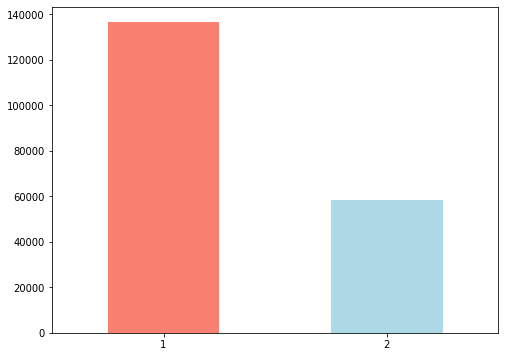

In [4]:
df.SEVERITYCODE.value_counts().plot(kind='bar',figsize=(8,6),color=["salmon", "lightblue"])
plt.xticks(rotation=0);

In [5]:
# we now see the corrlation beween Features 
data_corr = df.corr()
data_corr

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


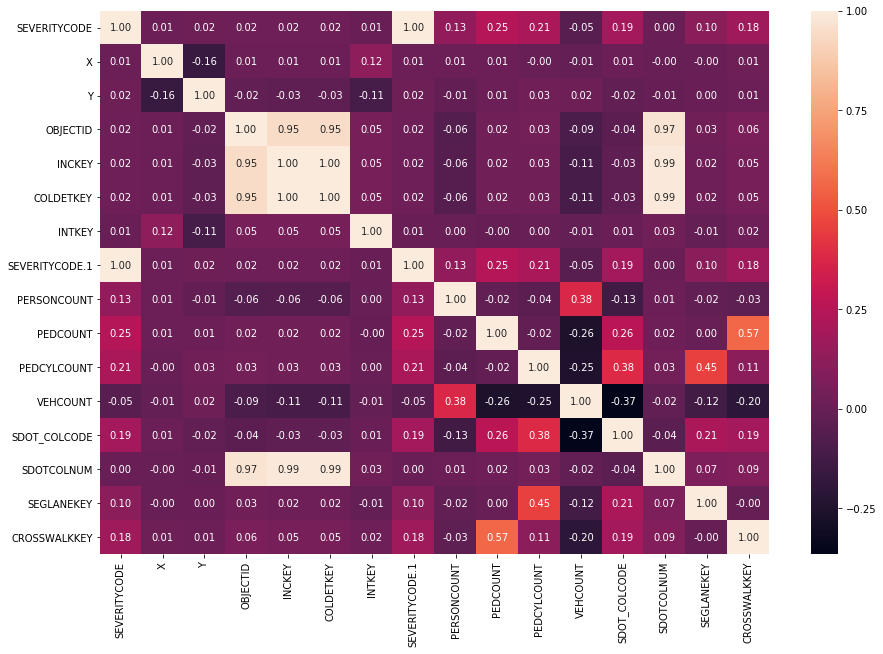

In [6]:
fig , ax =plt.subplots(figsize=(15,10))

ax =sns.heatmap(data_corr,fmt='.2f',annot=True)

bottom ,top = ax.get_ylim()

ax.set_ylim(bottom + 0.5,top - 0.5);

In [7]:
#we will focues in some feature that make result 
car_acc = df[['WEATHER','ROADCOND','LIGHTCOND','VEHCOUNT','JUNCTIONTYPE','PERSONCOUNT','SEVERITYCODE']]

**Data Dictionary **

1. WEATHER : A description of the weather conditions during the time of the collision.

2. ROADCOND : The condition of the road during the collision.

3. LIGHTCOND : The light conditions during the collision.

4. VEHCOUNT : The number of vehicles involved in the collision. This is entered by the state.

5. JUNCTIONTYPE : Category of junction at which collision took place

6. PERSONCOUNT : The total number of people involved in the collision

7. SEVERITYCODE : A code that corresponds to the severity of the collision:

          * 3 — fatality
          * 2b —serious injury
          * 2 — injury
          * 1 — prop damage
          * 0 — unknown
          

In [8]:
car_acc

,WEATHER,ROADCOND,LIGHTCOND,VEHCOUNT,JUNCTIONTYPE,PERSONCOUNT,SEVERITYCODE
0,Overcast,Wet,Daylight,2,At Intersection (intersection related),2,2
1,Raining,Wet,Dark - Street Lights On,2,Mid-Block (not related to intersection),2,1
2,Overcast,Dry,Daylight,3,Mid-Block (not related to intersection),4,1
3,Clear,Dry,Daylight,3,Mid-Block (not related to intersection),3,1
4,Raining,Wet,Daylight,2,At Intersection (intersection related),2,2
...,...,...,...,...,...,...,...
194668,Clear,Dry,Daylight,2,Mid-Block (not related to intersection),3,2
194669,Raining,Wet,Daylight,2,Mid-Block (not related to intersection),2,1
194670,Clear,Dry,Daylight,2,At Intersection (intersection related),3,2
194671,Clear,Dry,Dusk,1,At Intersection (intersection related),2,2


In [9]:
car_acc['WEATHER']

0         Overcast
1          Raining
2         Overcast
3            Clear
4          Raining
            ...   
194668       Clear
194669     Raining
194670       Clear
194671       Clear
194672       Clear
Name: WEATHER, Length: 194673, dtype: object

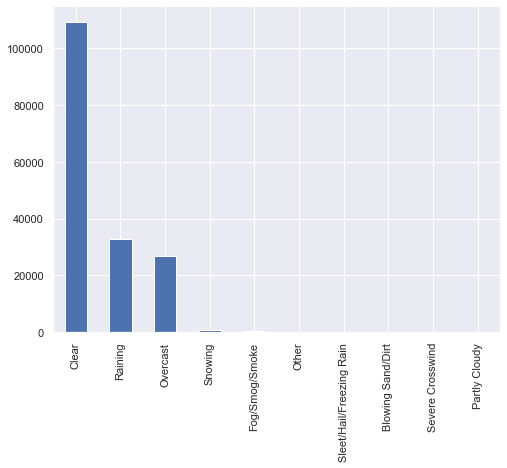

In [91]:
car_acc['WEATHER'].value_counts().plot(kind='bar',figsize=(8,6));


Most car accident happen when weather is :
         - Clear
         - Raining
         - Overcast
         
         

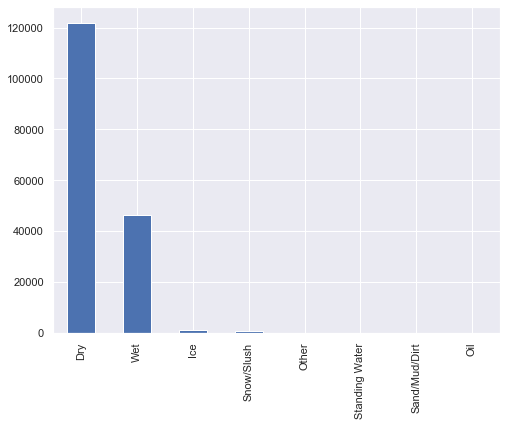

In [92]:
car_acc['ROADCOND'].value_counts().plot(kind='bar',figsize=(8,6));

here The condition of the road during the collision is :
    - Dry
    - Wet

In [12]:
car_acc.isna().sum()

WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
VEHCOUNT           0
JUNCTIONTYPE    6329
PERSONCOUNT        0
SEVERITYCODE       0
dtype: int64

In [13]:
car_acc.dtypes

WEATHER         object
ROADCOND        object
LIGHTCOND       object
VEHCOUNT         int64
JUNCTIONTYPE    object
PERSONCOUNT      int64
SEVERITYCODE     int64
dtype: object

## Find The Patterns between WEATHER  VS SEVERITYCODE     

In [14]:
pd.crosstab(df.WEATHER,df.SEVERITYCODE)

SEVERITYCODE,1,2
WEATHER,,
Blowing Sand/Dirt,41,15
Clear,75295,35840
Fog/Smog/Smoke,382,187
Other,716,116
Overcast,18969,8745
Partly Cloudy,2,3
Raining,21969,11176
Severe Crosswind,18,7
Sleet/Hail/Freezing Rain,85,28


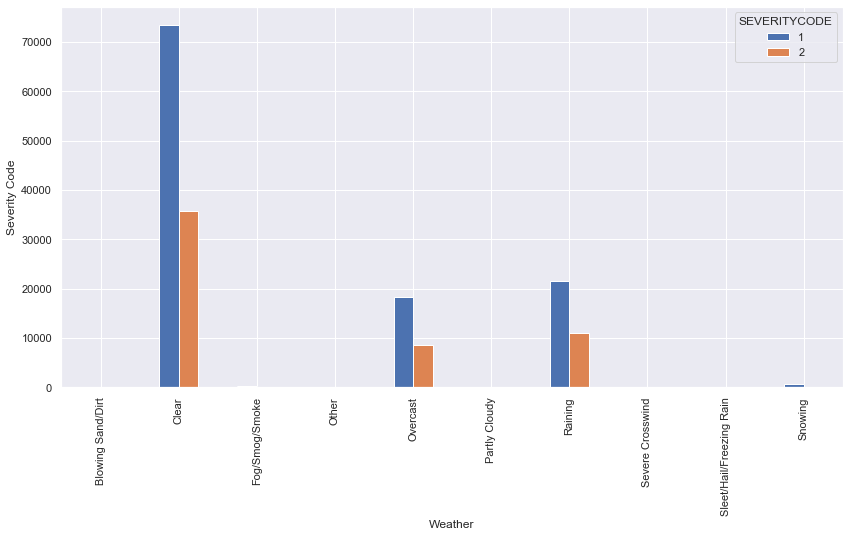

In [93]:
pd.crosstab(car_acc.WEATHER,car_acc.SEVERITYCODE).plot(kind='bar',figsize=(14,7));
plt.xlabel('Weather')
plt.ylabel('Severity Code');

So , We will drop "Unkown" Values 

In [16]:
car_acc.drop(car_acc[car_acc['WEATHER']=='Unknown'].index,inplace=True)

C:\Users\Mohamed Basher\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


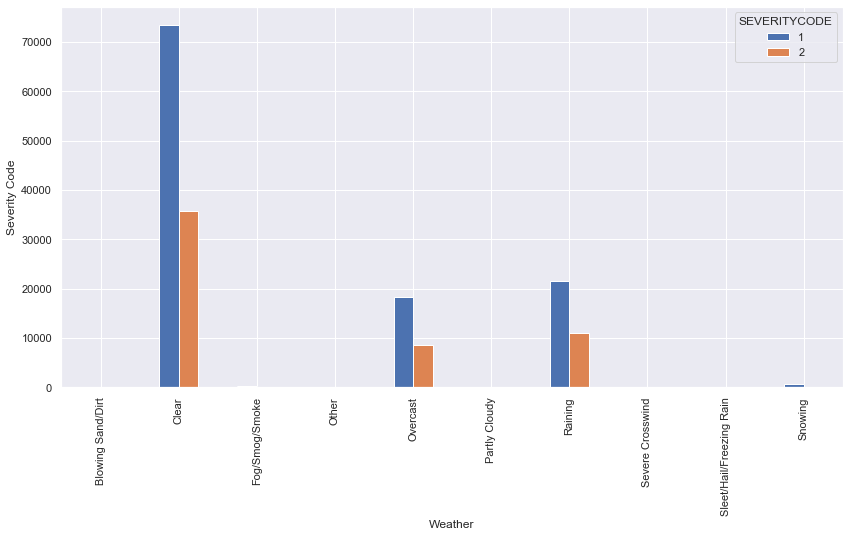

In [94]:
pd.crosstab(car_acc.WEATHER,car_acc.SEVERITYCODE).plot(kind='bar',figsize=(14,7));
plt.xlabel('Weather')
plt.ylabel('Severity Code');

## Find The Patterns between Road Condition VS SEVERITYCODE

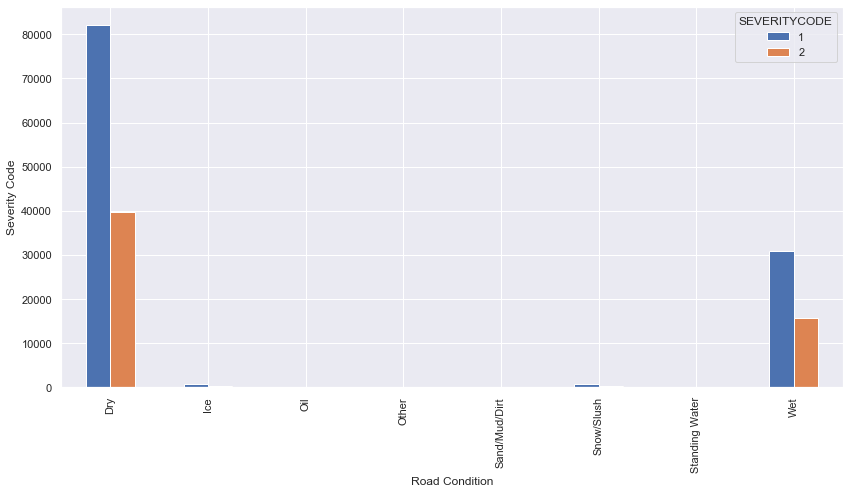

In [90]:
pd.crosstab(car_acc.ROADCOND,car_acc.SEVERITYCODE).plot(kind='bar',figsize=(14,7));
plt.xlabel('Road Condition')
plt.ylabel('Severity Code');
#we see that most Car accident happen in Road Condition : Dry and Wet 

In [19]:
#we will drop 'Unknown' Values 
car_acc.drop(car_acc[car_acc['ROADCOND']=='Unknown'].index,inplace=True)

In [20]:
car_acc.ROADCOND.unique()

array(['Wet', 'Dry', nan, 'Snow/Slush', 'Ice', 'Other', 'Sand/Mud/Dirt',
       'Standing Water', 'Oil'], dtype=object)

## Find The Patterns between Light Condition VS SEVERITYCODE

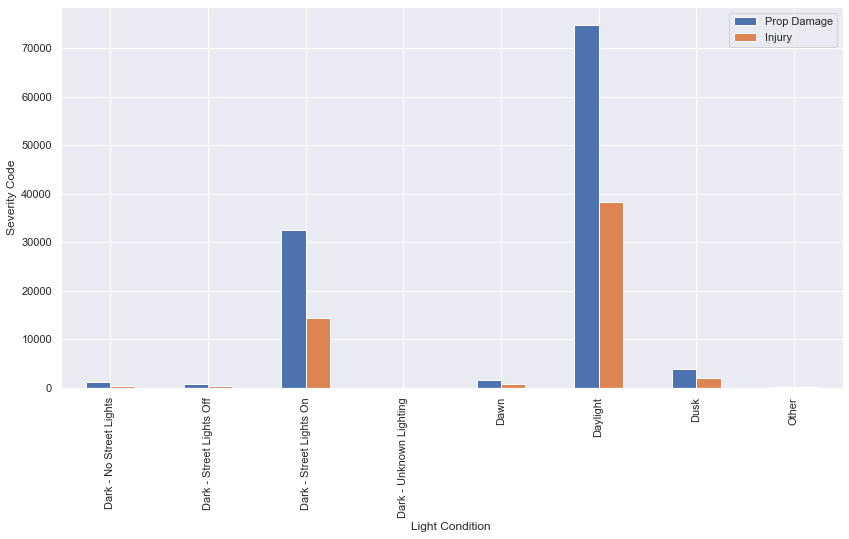

In [95]:
pd.crosstab(car_acc.LIGHTCOND,car_acc.SEVERITYCODE).plot(kind='bar',figsize=(14,7));
plt.xlabel('Light Condition ')
plt.ylabel('Severity Code');
plt.legend({'Prop Damage':1,'Injury':2});

In [22]:
#we will drop 'Unknown' Values 
car_acc.drop(car_acc[car_acc['LIGHTCOND']=='Unknown'].index,inplace=True)

In [23]:
car_acc.LIGHTCOND.unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       nan, 'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other',
       'Dark - Unknown Lighting'], dtype=object)

## Find The Patterns between VEHCOUNT VS SEVERITYCODE

VEHCOUNT : The number of vehicles involved in the collision. This is entered by the state.

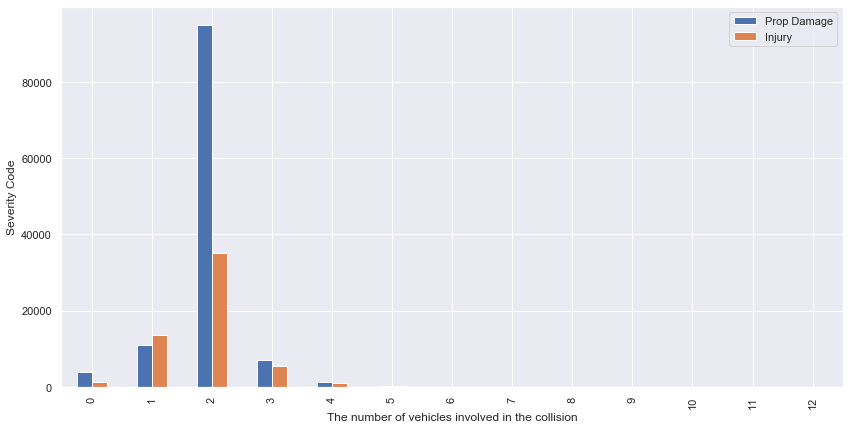

In [96]:
pd.crosstab(car_acc.VEHCOUNT,car_acc.SEVERITYCODE).plot(kind='bar',figsize=(14,7));
plt.xlabel('The number of vehicles involved in the collision')
plt.ylabel('Severity Code');
plt.legend({'Prop Damage':1,'Injury':2});

The number of vehicles involved in the collision in range between 1:4 , and most injury happen betweeb two vehicle

## Find The Patterns between JUNCTIONTYPE VS SEVERITYCODE

JUNCTIONTYPE : Category of junction at which collision took place

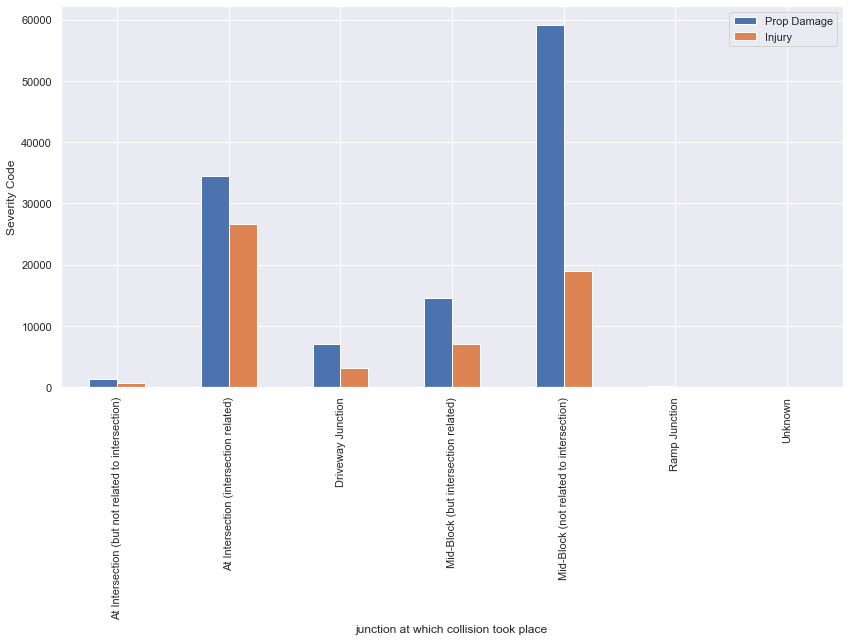

In [97]:
pd.crosstab(car_acc.JUNCTIONTYPE,car_acc.SEVERITYCODE).plot(kind='bar',figsize=(14,7));
plt.xlabel('junction at which collision took place')
plt.ylabel('Severity Code');
plt.legend({'Prop Damage':1,'Injury':2});

## Find The Patterns between PERSONCOUNT VS SEVERITYCODE
PERSONCOUNT : The total number of people involved in the collision

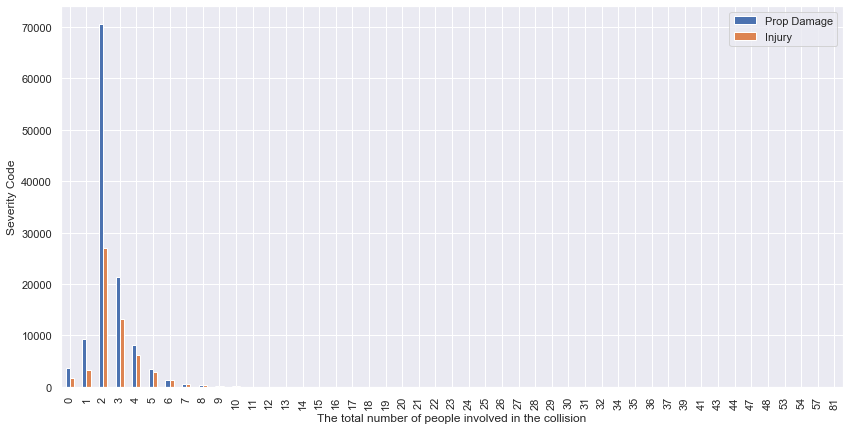

In [98]:
pd.crosstab(car_acc.PERSONCOUNT,car_acc.SEVERITYCODE).plot(kind='bar',figsize=(14,7));
plt.xlabel('The total number of people involved in the collision')
plt.ylabel('Severity Code');
plt.legend({'Prop Damage':1,'Injury':2});

Most number of people involved in the collision when we look to Bar is  2 and 3  , and most  severity is prop Damage 

### Correlation Between Features

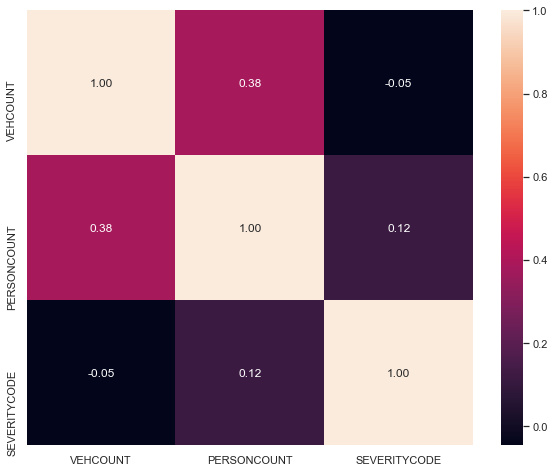

In [99]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(car_acc.corr(),annot=True,fmt='.2f')
bottom ,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5);

# Now we will prepare Data to use in Machine learning Model 

* We looking first for Convert Object , String values to Numeric Values
* And Fill Missing Values in our Data 

In [28]:
data_info = pd.DataFrame(data=car_acc.isna().sum(),columns=['Missing Values'],index=car_acc.columns)
data_info['Data Types'] = car_acc.dtypes

In [29]:
data_info

,Missing Values,Data Types
WEATHER,5067,object
ROADCOND,4995,object
LIGHTCOND,5121,object
VEHCOUNT,0,int64
JUNCTIONTYPE,2676,object
PERSONCOUNT,0,int64
SEVERITYCODE,0,int64


#### Import library for fill Missing Data and Convert Categorical data to Numerical Values  , We will use Pipeline 


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [31]:
#Define Defferent Features and transformer Pipeline 

categorical_feature = ['WEATHER','ROADCOND','LIGHTCOND','JUNCTIONTYPE']
categorical_transformer =Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))])


In [32]:
#Split Data 

X=car_acc.drop('SEVERITYCODE',axis=1)
y=car_acc['SEVERITYCODE']

In [33]:
#setup preprocessing Steps (Fill Missing values , then convert to numbers)

preprocessor =ColumnTransformer(transformers=[('cat',categorical_transformer,categorical_feature)])

preprocessor_x =preprocessor.fit_transform(X)

In [34]:
#bulid Train & Test Data 

X_train ,X_test,y_train,y_test = train_test_split(preprocessor_x,y,test_size=0.2,random_state = 42)

### Try 3 Different ML Models :
1. Logistic Regrassion

2. K-Nearest Neighbours Classifier

3. Random Forest Classifier

In [35]:
#Create Dictionary containing our Models 
models = {'Logistic Regrassion': LogisticRegression(),
         'KNN':KNeighborsClassifier() , 
         'Random Forest ':RandomForestClassifier()}

#Create a Function to fit and score models 

def fit_and_score(models ,X_train,X_test,y_train,y_test):
    
    """
    Fit and Evaluate Models 
    Models : a dictionary of Sklearn ML Models 
    X_train :Trainning Data (No labels)
    X_test : Testing Data (No labels)
    y_train :Trainnin labels
    y_test :testing Labels
    """
    
    #set a rondom Seed 
    
    np.random.seed(42)
    
    #Make a dictionary to keep model score 
    
    models_score ={}
    
    #Loop Through Models 
    
    for name , model in models.items():
        
        #fit the model to the data 
        
        model.fit(X_train,y_train)
        
        #Evaluate the model and append to models_score 
        
        models_score[name]=model.score(X_test,y_test)
    
    return models_score

In [36]:
#try our Models
models_score = fit_and_score(models ,X_train,X_test,y_train,y_test)
models_score

C:\Users\Mohamed Basher\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohamed Basher\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Logistic Regrassion': 0.6803584127435642,
 'KNN': 0.6354999288863604,
 'Random Forest ': 0.6795050490684114}

## Model Comparison

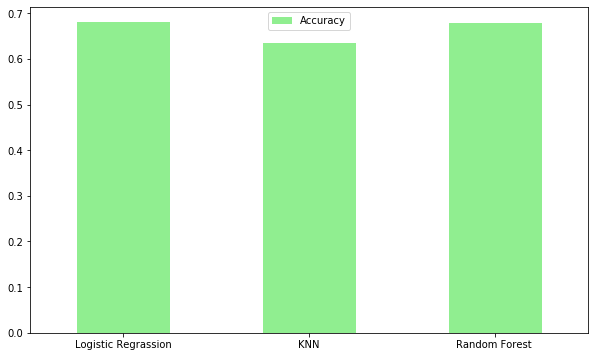

In [37]:
#Create Data Frame 
model_comp_df = pd.DataFrame(models_score ,index=['Accuracy'])

#plot our Models 
model_comp_df.T.plot.bar(figsize=(10,6),color='lightgreen')
plt.xticks(rotation=0);

#  Hyperprameter Tuning with GridSearchCV

Using Different parameter in our models to increase model's accuracy

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
# We will try to improve Logistic Regrassion

# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

* Now let's use GridSearchCV with Logistic Regrassion

In [40]:
#Setup hyperprameter in GridSearchCV 
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

#Fit hyperprameter using GridSearchCV in LG 
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.0000000...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
       

In [41]:
#Best parameter we found 
gs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [43]:
#Score The Model 
print(f"Logistic Regression Score : {gs_log_reg.score(X_test,y_test) *100:0.2f}%")

Logistic Regression Score : 68.04%


# Evaluating a classification model

* we use :
   
    * Classification report - classification_report()
    * Precision - precision_score()
    * F1-score - f1_score()

In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [44]:
y_preds = gs_log_reg.predict(X_test)

In [45]:
y_preds

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [46]:
y_test

41836     2
83113     1
101176    1
84008     1
153241    1
         ..
144659    1
93899     1
146718    1
183846    1
32041     1
Name: SEVERITYCODE, Length: 35155, dtype: int64

## Classification report 

We can make a classification report using classification_report() and passing it the true labels as well as our models predicted labels.

In [54]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.68      1.00      0.81     23921
           2       0.00      0.00      0.00     11234

    accuracy                           0.68     35155
   macro avg       0.34      0.50      0.40     35155
weighted avg       0.46      0.68      0.55     35155



C:\Users\Mohamed Basher\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Cross validation score

We'll take the best model along with the best hyperparameters and use cross_val_score() along with various scoring parameter values.

cross_val_score() works by taking an estimator (machine learning model) along with data and labels. It then evaluates the machine learning model on the data and labels using cross-validation and a defined scoring parameter.

In [55]:
gs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [60]:
clf =LogisticRegression(C=0.0001,
                        solver='liblinear')


In [63]:
# Cross-validated accuracy score

cv_acc =cross_val_score(clf,
                       preprocessor_x,
                       y,
                       cv=5,
                       scoring="accuracy")
cv_acc

array([0.67580714, 0.67580714, 0.67580714, 0.67581714, 0.67581714])

In [64]:
cv_acc =np.mean(cv_acc)
cv_acc

0.6758111407684189

In [69]:
# Cross-validated precision score

cv_pre =np.mean(cross_val_score(clf,
                       preprocessor_x,
                       y,
                       cv=5,
                       scoring="precision"))
cv_pre

0.6758111407684189

In [70]:
# Cross-validated F1 score

cv_f1 =np.mean(cross_val_score(clf,
                       preprocessor_x,
                       y,
                       cv=5,
                       scoring="f1"))
cv_f1

0.8065480940173073

## Plot CV Metrics Score

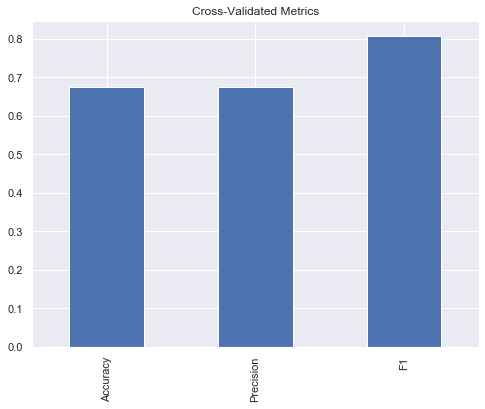

In [89]:
sns.set()

cv_metrics =pd.DataFrame({'Accuracy':cv_acc,'Precision':cv_pre,'F1':cv_f1},index=[0])

cv_metrics.T.plot.bar(figsize=(8,6),title="Cross-Validated Metrics", legend=False);